# Lab work #0
# Lypnytska Inna
# CS32

# 1. Using Numpy

**Task 1.1**: Create a NumPy array containing the numbers from 1 to 10. Perform the following operations:
1. Find the sum of all elements in the array.
2. Find the mean of all elements in the array.
3. Find the maximum and minimum elements in the array.
4. Sort the array in ascending order.

In [17]:
import numpy as np

arr = np.arange(1, 11)  # Створюємо масив [1, 2, ..., 10]
print("Array:", arr)
print("Sum:", np.sum(arr))  # Сума
print("Mean:", np.mean(arr))  # Середнє
print("Max:", np.max(arr))  # Максимум
print("Min:", np.min(arr))  # Мінімум
print("Sorted:", np.sort(arr))  # Сортування


Array: [ 1  2  3  4  5  6  7  8  9 10]
Sum: 55
Mean: 5.5
Max: 10
Min: 1
Sorted: [ 1  2  3  4  5  6  7  8  9 10]


**Task 1.2**: Create a 2x3 NumPy matrix containing the numbers from -10 to 10. Perform the following operations:
1. Find the transpose of the matrix.
2. Find the determinant of the matrix (It must throw an error for [non-square matrices](https://math.stackexchange.com/questions/854180/determinant-of-a-non-square-matrix)).
3. Multiply the matrix by a scalar (e.g., 2).
4. Add two matrices element-wise.

In [18]:
matrix = np.array([[-10, -5, 0], [5, 10, 15]])
print("Matrix:\n", matrix)
print("Transpose:\n", matrix.T)

try:
    det = np.linalg.det(matrix)  # очікуємо помилку
    print("Determinant:", det)
except np.linalg.LinAlgError as e:
    print("Error (as expected for non-square matrix):", e)

print("Matrix multiplied by 2:\n", matrix * 2)

another_matrix = np.array([[1, 2, 3], [4, 5, 6]])
print("Element-wise addition:\n", matrix + another_matrix)



Matrix:
 [[-10  -5   0]
 [  5  10  15]]
Transpose:
 [[-10   5]
 [ -5  10]
 [  0  15]]
Error (as expected for non-square matrix): Last 2 dimensions of the array must be square
Matrix multiplied by 2:
 [[-20 -10   0]
 [ 10  20  30]]
Element-wise addition:
 [[-9 -3  3]
 [ 9 15 21]]


# 2. Using Pandas

**Task 2.1**: Data Loading and Inspection

Load the Iris dataset into a Pandas DataFrame and inspect the first few rows.

Steps:
1. Load the Iris dataset from a CSV file or directly from a URL.
2. Display the first 5 rows of the DataFrame using the head() method.
3. Use the info() method to get a concise summary of the DataFrame.

In [19]:
import pandas as pd

# Завантаження Iris dataset
df = pd.read_csv("fisher_irises.csv")

# Виведення перших 5 рядків
print(df.head())

# Інформація про DataFrame
print(df.info())


   sepal_length  sepal_width  petal_length  petal width target_class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal width   147 non-null    float64
 4   target_class  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


**Task 2.2**: Data Cleaning & Preprocessing

Handle missing values and ensure data types are appropriate.

Steps:
1. Check for any missing values in the DataFrame using isnull().sum().
2. If there are missing values, fill them with the mean of the respective column.
3. Convert any necessary columns to the appropriate data type (e.g., categorical to numerical).

In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/fisher_irises.csv")

# Виведемо список стовпців
print("Стовпці датафрейму:", df.columns.tolist())

# Примусово перетворимо всі числові стовпці (ігноруючи 'species')
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal width']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # некоректні значення -> NaN

# Перевіримо, де з'явились NaN
print("Кількість пропусків після перетворення:")
print(df[numeric_cols].isnull().sum())

# Заповнимо середнім по стовпцях
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Перетворимо species на числа (якщо є)
if 'species' in df.columns:
    df['species'] = df['species'].astype('category').cat.codes

print("\nОчищені дані:")
print(df.head())


Стовпці датафрейму: ['sepal_length', 'sepal_width', 'petal_length', 'petal width', 'target_class']
Кількість пропусків після перетворення:
sepal_length    1
sepal_width     2
petal_length    0
petal width     3
dtype: int64

Очищені дані:
   sepal_length  sepal_width  petal_length  petal width target_class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Task 2.3**: Data Analysis

Perform basic statistical analysis on the dataset.

Steps:
1. Calculate the mean, median, and standard deviation of each numerical column.
2. Group the data by the 'species' column and calculate the mean of each numerical column for each species.
3. Use the describe() method to get a statistical summary of the DataFrame.

In [22]:
import pandas as pd

# Завантаження даних
df = pd.read_csv("fisher_irises.csv")

# Перейменування стовпців (якщо немає заголовків або вони некоректні)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Перевірка типів даних
print("Типи даних:\n", df.dtypes)

# Перетворення числових стовпців (про всяк випадок)
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Перевірка на наявність пропущених значень
print("\nПропущені значення:\n", df[numeric_columns].isnull().sum())

# Заповнення пропусків середнім значенням (якщо такі є)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Обчислення описових статистик
print("\n Середнє значення:")
print(df[numeric_columns].mean())

print("\n Медіана:")
print(df[numeric_columns].median())

print("\n Стандартне відхилення:")
print(df[numeric_columns].std())


Типи даних:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Пропущені значення:
 sepal_length    1
sepal_width     2
petal_length    0
petal_width     3
dtype: int64

 Середнє значення:
sepal_length    5.829530
sepal_width     3.055405
petal_length    3.758667
petal_width     1.182993
dtype: float64

 Медіана:
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

 Стандартне відхилення:
sepal_length    0.810626
sepal_width     0.433386
petal_length    1.764420
petal_width     0.754972
dtype: float64


**Task 2.4**: Data Visualization

Visualize the distribution of data using Pandas' built-in plotting capabilities.

Steps:
1. Create a histogram for each numerical column to visualize the distribution of data.
2. Create a box plot for each numerical column to identify any outliers.
3. Use a pair plot to visualize relationships between different numerical features.

Стовпці датафрейму: ['sepal_length', 'sepal_width', 'petal_length', 'petal width', 'target_class']


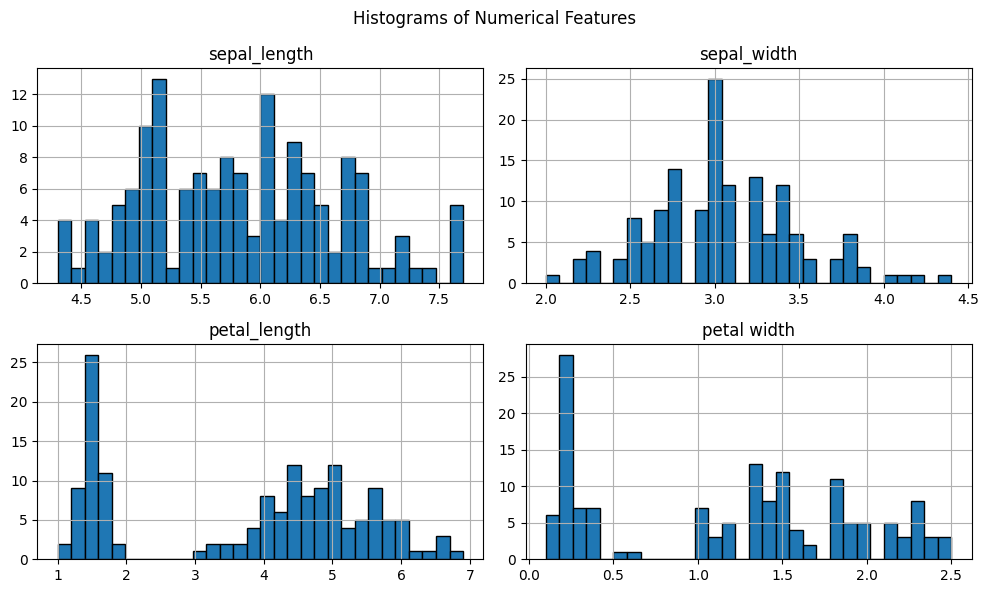

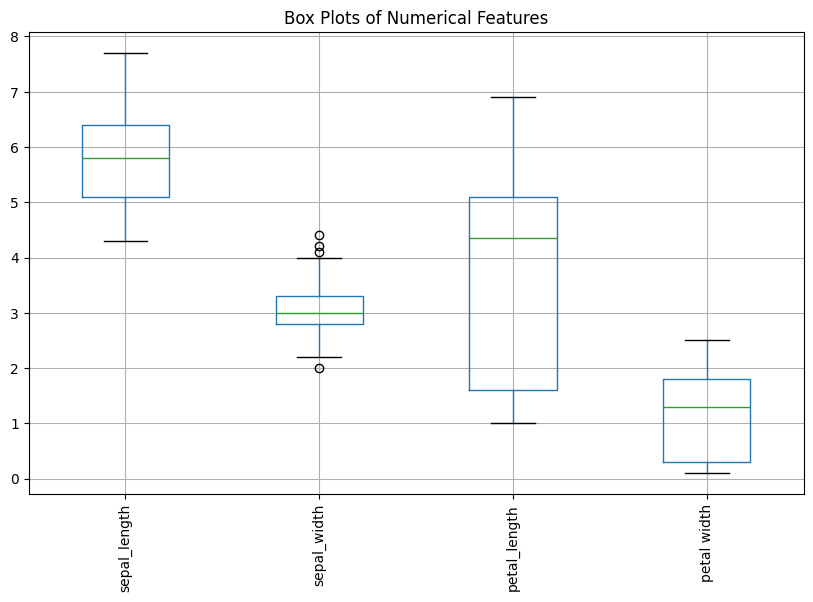

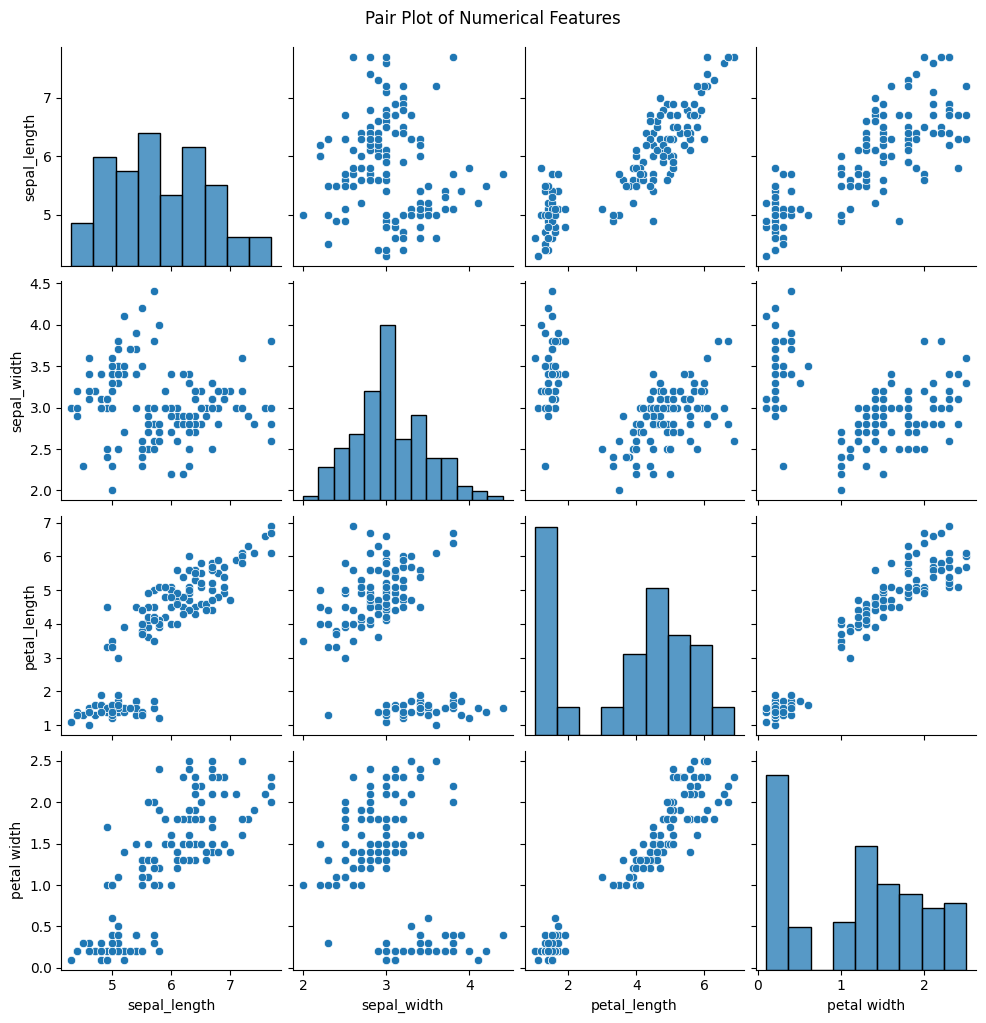

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fisher_irises.csv")

# Виведемо список стовпців
print("Стовпці датафрейму:", df.columns.tolist())

# 1. Побудова гістограм для кожного числового стовпця
df.hist(figsize=(10, 6), edgecolor='black', bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# 2. Побудова box plot для виявлення викидів у кожному числовому стовпці
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=90)  # Поворот підписів для зручності
plt.show()

# 3. Використання pair plot для аналізу взаємозв'язків між числовими ознаками
sns.pairplot(df)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()



# 3. Using Matplotlib & Seaborn

**Task 3.1**: Basic Plotting with Matplotlib

Create basic plots to visualize the Iris dataset.

Steps:
1. Create a scatter plot of sepal_length vs. sepal_width using Matplotlib.
2. Color the points by species to visualize the separation between different classes.
3. Add titles, labels, and a legend to the plot.

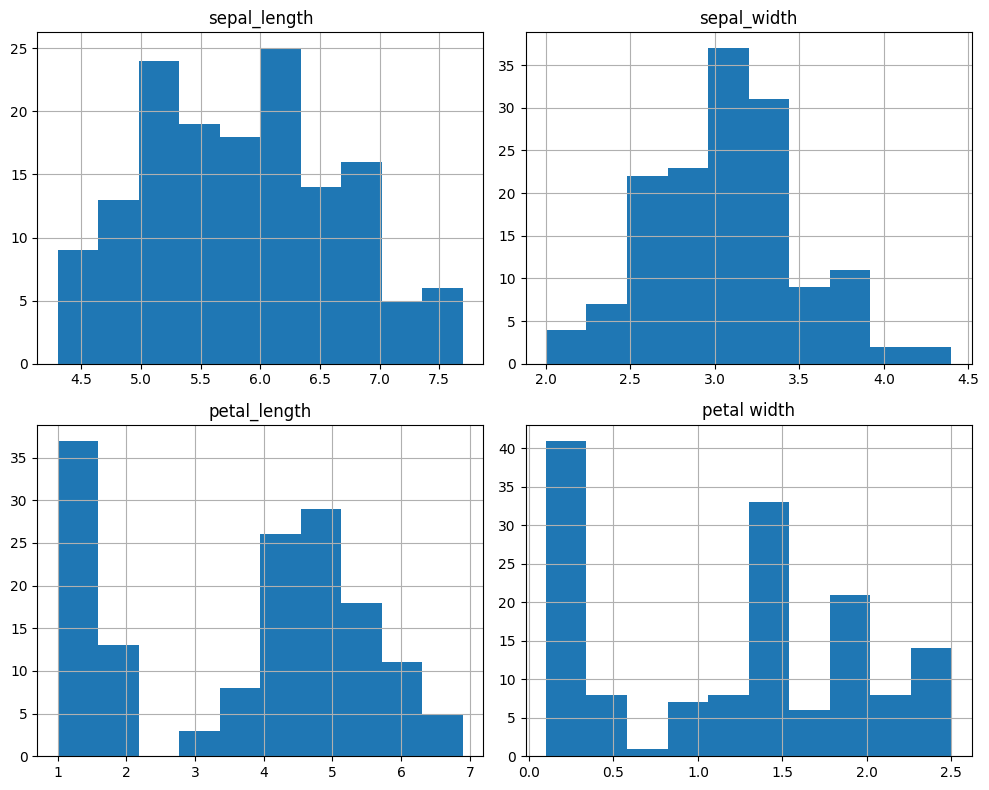

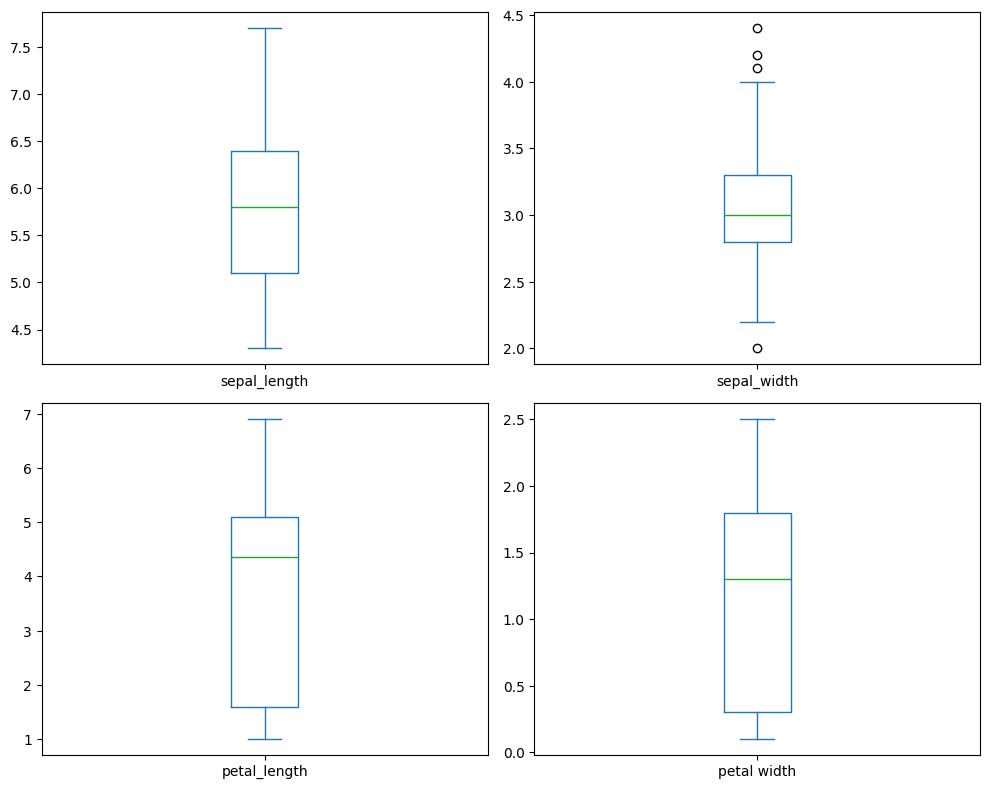

In [25]:
import matplotlib.pyplot as plt

# Гістограми для кожного числового стовпця
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplot для кожного числового стовпця
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8))
plt.tight_layout()
plt.show()


**Task 3.2**: Advanced Visualizations with Seaborn

Use Seaborn to create more complex and informative visualizations.

Steps:

1. Create a pair plot using Seaborn to visualize relationships between all pairs of features in the dataset.
2. Use different colors to represent different species in the pair plot.
3. Create a violin plot to visualize the distribution of petal_length for each species.

Стовпці у датасеті: ['sepal_length', 'sepal_width', 'petal_length', 'petal width', 'target_class']


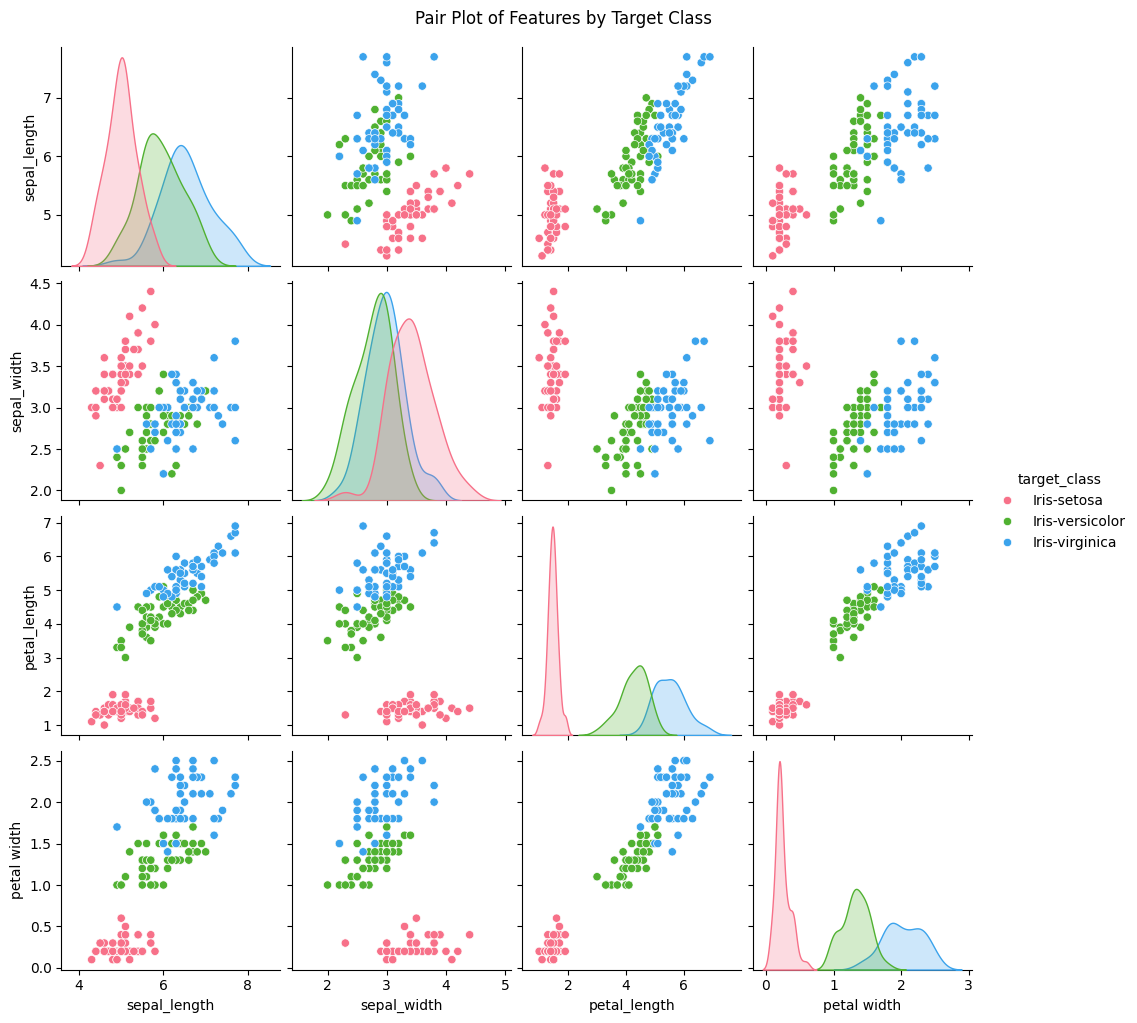

<ipython-input-14-4e541320e40f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=hue_column, y="petal_length", data=df, palette="pastel")


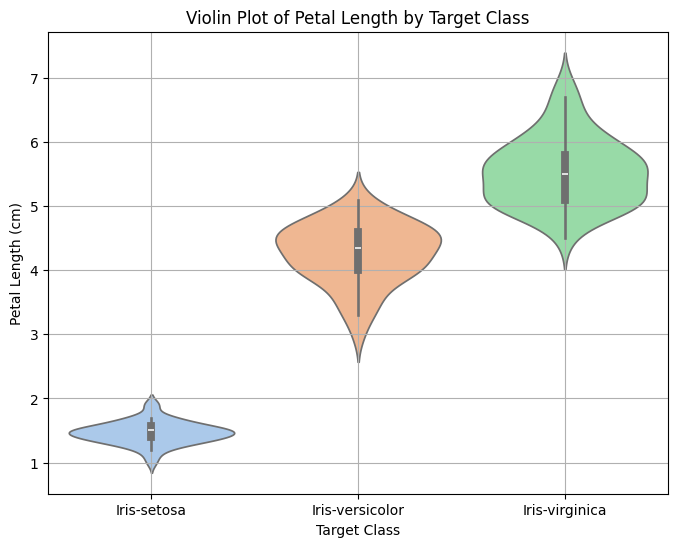

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv("fisher_irises.csv")

# Перевіримо назви стовпців
print("Стовпці у датасеті:", df.columns.tolist())

# Використовуємо `target_class` замість `class`
hue_column = "target_class"

# 1. Побудова pair plot (всі пари ознак, кольори — за target_class)
sns.pairplot(df, hue=hue_column, palette="husl")
plt.suptitle("Pair Plot of Features by Target Class", y=1.02)
plt.show()

# 2. Побудова violin plot для petal_length за target_class
plt.figure(figsize=(8, 6))

# Переконаємось, що назва стовпця `petal width` правильна
df.rename(columns={"petal width": "petal_width"}, inplace=True)

sns.violinplot(x=hue_column, y="petal_length", data=df, palette="pastel")
plt.title("Violin Plot of Petal Length by Target Class")
plt.xlabel("Target Class")
plt.ylabel("Petal Length (cm)")
plt.grid(True)
plt.show()

**Task 3.3**: Combining Matplotlib and Seaborn

Combine the strengths of Matplotlib and Seaborn to create customized visualizations.

Steps:

1. Create a heatmap using Seaborn to visualize the correlation matrix of the numerical features in the dataset.
2. Customize the heatmap by adjusting the color palette and adding annotations.
3. Use Matplotlib to add a title and adjust the layout of the heatmap for better readability.

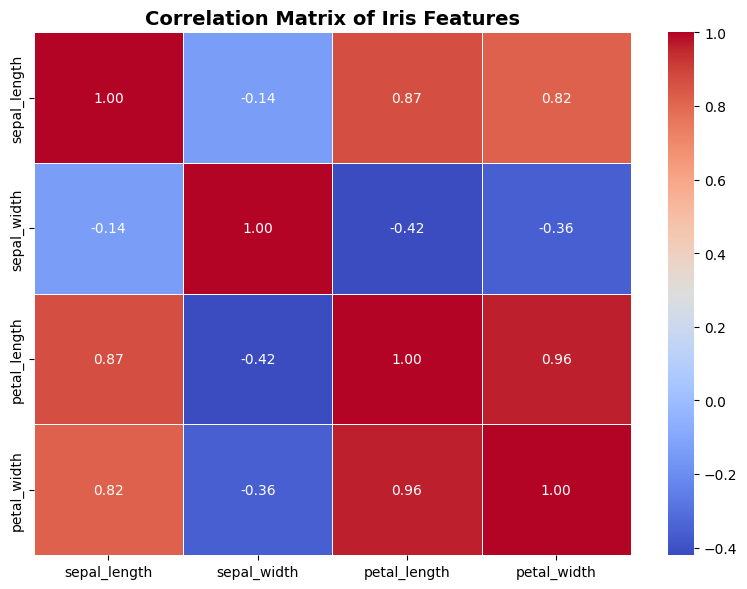

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення кореляційної матриці
corr_matrix = df.corr(numeric_only=True)

# Створення фігури
plt.figure(figsize=(8, 6))

# Побудова теплової карти з анотаціями і кольоровою палітрою
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Додавання заголовка через Matplotlib
plt.title("Correlation Matrix of Iris Features", fontsize=14, fontweight='bold')

# Оптимізація розташування
plt.tight_layout()
plt.show()


# BONUS TASK

**Bonus Task** Found a code for making __interactive__ 3D plots using `Plotly`

In [27]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("fisher_irises.csv")

# Побудова 3D Scatter Plot
fig = px.scatter_3d(df, x="sepal_length", y="sepal_width", z="petal_length", color="target_class", title="Interactive 3D Scatter Plot")
fig.update_layout(width=800, height=600)
fig.show()

